In [ ]:
# Projeto de Analise da Performance dos Estudantes

**Objetivo:** Este notebook tem como objetivo construir e avaliar modelos de Machine Learning para prever a probabilidade dos alunos serem aprovados com base em um conjunto de variáveis fornecido pela escola.

**Dataset:** Utilizaremos o dataset "Student Performance", disponível publicamente (UC Irvine Machine Learning Repositore).
                                                                                    
    - "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip".

**Metodologia:**

1. Importação de Bibliotecas e Configurações.
2. Carregamento e Junção dos Dados: Carregar df_mat e df_por, juntá-los.
3. Compreensão Inicial dos Dados:
3.1 Verifica a Tabela das notas de Matemática
3.2 Verifica a Tabela das notas de Português
3.3 Adiciona uma coluna "materia" em cada tabela e junta as tabelas em df_alunos.
3.4 Renomear as colunas do DataSet
3.5 Informações Gerais e Dimensões
3.6 Visualização Inicial (Head & Tail)
3.7 Informações Gerais e Dimensões
3.8 Verificação de Nulos e Duplicados
3.9 Estatísticas Descritivas
4. Engenharia de Features Inicial:
4.1 Adiciona uma coluna que mostra o desempenho do aluno
   *   Criação da coluna desempenho (5 classes).
   *   Tradução das colunas.
   *   Criação de media_notas, progresso_semestre, progresso_final, total_alcool.
5. Análise Exploratória de Dados (EDA) Detalhada: Esta será sua maior seção.
5.1. Análise de Variáveis Numéricas Chave: (Distribuições, Boxplots vs. Desempenho)
   *   media_notas
   *   faltas
   *   tempo_estudo
   *   total_alcool
   *   Outras como idade, reprovacoes.
5.2. Análise de Variáveis Categóricas Chave: (Contagens, Relação com Desempenho)
   *   desempenho (distribuição)
   *   materia vs desempenho
   *   apoio_familia, apoio_escola vs desempenho
   *   quer_ensino_superior vs desempenho
   *   Outras relevantes.
5.3. Análise de Correlações: Heatmaps.
5.4. Análise de Interações: As que você já fez (álcool vs. saídas, tempo de estudo vs. apoio, etc.).
5.5. Visualizações Combinadas e Avançadas: (FacetGrid, Pairplot se útil).
   *   Adicione aqui os testes estatísticos (Qui-Quadrado, ANOVA, Teste t) se decidir incluí-los.
6. Pré-processamento para Modelagem:
   *   Tratamento de Outliers (como você fez para faltas e idade).
   *   Definição do problema de predição (ex: 3 classes para desempenho).
   *   Seleção de Features (remoção de vazamento de dados).
   *   One-Hot Encoding.
   *   Escalonamento (StandardScaler ou RobustScaler).
   *   Divisão Treino/Teste.
   *   (Opcional) Reamostragem (SMOTE, etc.) - se decidir manter, explique bem o porquê e o resultado.
7. Modelagem Preditiva:
   *   Treinamento dos modelos (Random Forest, LightGBM, etc.).
   *   Avaliação (Classification Report, Matriz de Confusão).
   *   (Opcional) Tuning de Hiperparâmetros.
   *   (Opcional) Análise de Importância de Features dos modelos / SHAP.
8. Conclusões:
   *   Principais achados da EDA.
   *   Desempenho dos modelos preditivos e suas limitações.
   *   Discussão sobre a dificuldade de prever o desempenho com as features disponíveis.
   *   Possíveis próximos passos ou direções futuras.
9. (Opcional) Exportação de Dados para Power BI: Código para salvar um CSV limpo ou um subconjunto dos dados para o Power BI.

**Observação:** Este notebook explora diferentes técnicas de pré-processamento para entender seu impacto no desempenho do modelo.
--------------------------------------------------------------------------------------------------------

# Projeto de Analise da Performance dos Estudantes

**Objetivo:** Este notebook tem como objetivo construir e avaliar modelos de Machine Learning para prever a probabilidade dos alunos serem aprovados com base em um conjunto de variáveis fornecido pela escola.

**Dataset:** Utilizaremos o dataset "Student Performance", disponível publicamente (UC Irvine Machine Learning Repositore).
                                                                                    
    - "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip".

**Metodologia:**
1.  Importação das bibliotecas necessárias.
2.  Carregamento e exploração inicial dos dados (EDA).
3.  Pré-processamento dos dados:
    *   Renomear colunas.
    *   Tratamento de valores implausíveis (Excluir os outliers em certas colunas).
4.  Engenharia de Features e Separação Treino/Teste:
    *   Separação inicial dos dados.
5.  Treinamento de Modelos Individuais (Opcional/Baseline):
    *   Treinar modelos básicos nos dados (DecisionTreeClassifier e RandomForestClassifier).
    *   Avaliação inicial.
6.  Conclusão: Resumo dos resultados e escolha da melhor abordagem.

**Observação:** Este notebook explora diferentes técnicas de pré-processamento para entender seu impacto no desempenho do modelo.

: 

## 1. Importação de Bibliotecas

Nesta seção, importamos todas as bibliotecas que serão utilizadas ao longo do projeto, organizadas por funcionalidade.

In [2]:
# [CÓDIGO - Bloco 01: Importações]
# Data Manipulation & Analysis
import pandas as pd
import urllib.request
import io

# Utilities
import warnings
import zipfile
import locale
import os

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model Selection & Splitting
from sklearn.model_selection import train_test_split

# Preprocessing & Feature Engineering
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Teste Qui-Quadrado
from scipy.stats import chi2_contingency

# Settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


## 2. Carregamento e Exploração Inicial dos Dados (EDA)

Carregamos o dataset e realizamos uma análise exploratória inicial para entender sua estrutura, tipos de dados, presença de valores ausentes e estatísticas descritivas básicas.

In [3]:
# Baixa e extrai direto do UCI
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
# response = urllib.request.urlopen(url)
# zip_file = zipfile.ZipFile(io.BytesIO(response.read()))
# zip_file.extractall("student_data")

# Carrega os dois datasets
df_mat = pd.read_csv("../student_data/student-mat.csv", sep=';')
df_por = pd.read_csv("../student_data/student-por.csv", sep=';')


### 2.1 Verifica a Tabela das notas de Matemática

In [5]:
print('Tabela das notas de matemática')
df_mat.head()

Tabela das notas de matemática


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


### 2.2 Verifica a Tabela das notas de Português

In [6]:
print('Tabela das notas de Português')
df_por.head()

Tabela das notas de Português


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


### 2.3 Adiciona uma coluna "materia" em cada tabela e junta as tabelas em df_alunos.

In [7]:
# Adiciona a coluna materia
df_mat['materia'] = 'matematica'
df_por['materia'] = 'portugues'

# Junta tudo
df_alunos = pd.concat([df_mat, df_por], ignore_index=True)

### 2.4 Renomear as colunas do DataSet

In [8]:
# Dicionário de tradução
traducoes = {
    'school': 'escola',
    'sex': 'sexo',
    'age': 'idade',
    'address': 'tipo_endereco',
    'famsize': 'tamanho_familia',
    'Pstatus': 'status_pais',
    'Medu': 'escolaridade_mae',
    'Fedu': 'escolaridade_pai',
    'Mjob': 'trabalho_mae',
    'Fjob': 'trabalho_pai',
    'reason': 'motivo_escola',
    'guardian': 'responsavel',
    'traveltime': 'tempo_transporte',
    'studytime': 'tempo_estudo',
    'failures': 'reprovacoes',
    'schoolsup': 'apoio_escola',
    'famsup': 'apoio_familia',
    'paid': 'aulas_particulares',
    'activities': 'atividades_extracurriculares',
    'nursery': 'frequentou_creche',
    'higher': 'quer_ensino_superior',
    'internet': 'acesso_internet',
    'romantic': 'relacionamento',
    'famrel': 'relacionamento_familiar',
    'freetime': 'tempo_livre',
    'goout': 'saidas',
    'Dalc': 'consumo_alcool_dia',
    'Walc': 'consumo_alcool_fimsemana',
    'health': 'estado_saude',
    'absences': 'faltas',
    'G1': 'nota1',
    'G2': 'nota2',
    'G3': 'nota3',
}

# Aplicar renomeação
df_alunos = df_alunos.rename(columns=traducoes)

### 2.5 Adiciona uma coluna que mostra o desempenho do aluno

-  2.5.1 Verifica a faixa das notas dos Alunos

In [20]:
# Pegar os parametros para a classificação do desempenho
print(df_alunos['nota3'].describe())

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: nota3, dtype: float64


- 2.5.2 Classificar as notas dos alunos de acordo com a descrição

In [18]:
# Função para classificar notas
def classificar_nota(nota):
    if nota <= 5:
        return 'Péssimo'
    elif nota <= 10:
        return 'Ruim'
    elif nota <= 13:
        return 'Normal'
    elif nota <= 16:
        return 'Bom'
    else:
        return 'Excelente'

# Cria a nova coluna
df_alunos['desempenho'] = df_alunos['nota3'].apply(classificar_nota)

- 2.5.3. Distribuição das classes de desempenho

Verifica o desempenho de todos os alunos

In [11]:
print(df_alunos['desempenho'].value_counts(normalize=True) * 100)

desempenho
Normal       35.153257
Ruim         30.651341
Bom          21.455939
Excelente     6.704981
Péssimo       6.034483
Name: proportion, dtype: float64


- 2.5.5. Contagem dos alunos por desempenho

In [19]:
# Cria uma tabela cruzada (contagem de alunos)
tabela_contagem = pd.crosstab(df_alunos['materia'], df_alunos['desempenho'])
print(tabela_contagem)

desempenho  Bom  Excelente  Normal  Péssimo  Ruim
materia                                          
matematica   76         24     109       46   140
portugues   148         46     258       17   180


- 2.5.6. Percentual do desempenho dos alunos

In [13]:
# Tabela cruzada para contar os desempenhos por matéria
tabela = pd.crosstab(df_alunos['materia'], df_alunos['desempenho'], normalize='index') * 100
print(tabela)

desempenho        Bom  Excelente     Normal    Péssimo       Ruim
materia                                                          
matematica  19.240506   6.075949  27.594937  11.645570  35.443038
portugues   22.804314   7.087827  39.753467   2.619414  27.734977


- 2.5.4. Distribuição de Desempenho por Matéria

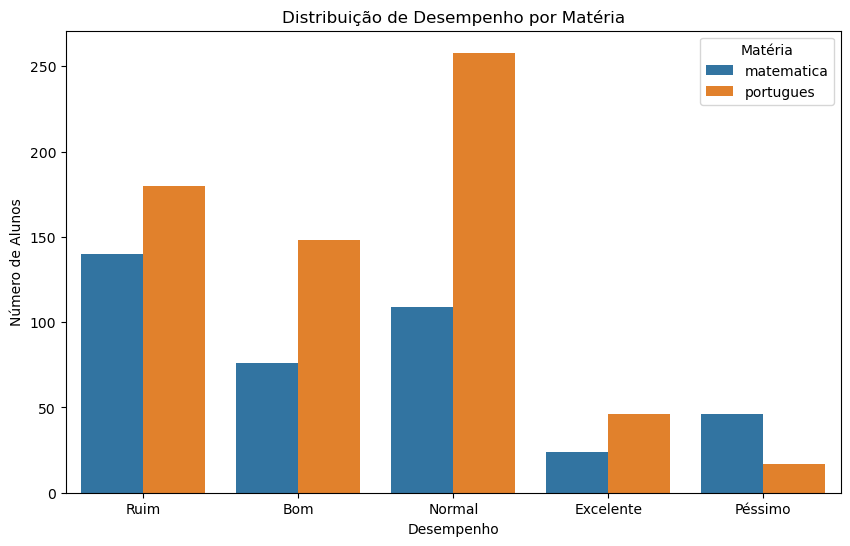

In [14]:
# Gráfico
plt.figure(figsize=(10,6))
sns.countplot(x='desempenho', hue='materia', data=df_alunos)
plt.title('Distribuição de Desempenho por Matéria')
plt.xlabel('Desempenho')
plt.ylabel('Número de Alunos')
plt.legend(title='Matéria')
plt.show()

### 4.6. Análise de Features Adicionais
#### 4.6.1. Engenharia de Features
Criação de novas variáveis:

- Média das três notas (nota1, nota2, nota3)

- Diferença entre nota2 e nota1 (progresso no semestre)

- Diferença entre nota3 e nota2 (progresso final)

- Total de consumo de álcool (consumo_alcool_dia + consumo_alcool_fimsemana)

- Indicador de melhora/piora nas notas

In [15]:
# Criar novas features
df_alunos['media_notas'] = (df_alunos['nota1'] + df_alunos['nota2'] + df_alunos['nota3']) / 3
df_alunos['progresso_semestre'] = df_alunos['nota2'] - df_alunos['nota1']
df_alunos['progresso_final'] = df_alunos['nota3'] - df_alunos['nota2']
df_alunos['total_alcool'] = df_alunos['consumo_alcool_dia'] + df_alunos['consumo_alcool_fimsemana']

### 2.6 Informações Gerais e Dimensões
Verificamos os tipos de dados, contagem de valores não nulos e as dimensões do DataFrame (linhas, colunas).

In [21]:
# [CÓDIGO - Bloco 05: Info]
print("\nInformações do DataFrame:")
df_alunos.info()

# [CÓDIGO - Bloco 06: Shape]
print("\nShape (Linhas, Colunas):")
print(df_alunos.shape)


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   escola                        1044 non-null   object 
 1   sexo                          1044 non-null   object 
 2   idade                         1044 non-null   int64  
 3   tipo_endereco                 1044 non-null   object 
 4   tamanho_familia               1044 non-null   object 
 5   status_pais                   1044 non-null   object 
 6   escolaridade_mae              1044 non-null   int64  
 7   escolaridade_pai              1044 non-null   int64  
 8   trabalho_mae                  1044 non-null   object 
 9   trabalho_pai                  1044 non-null   object 
 10  motivo_escola                 1044 non-null   object 
 11  responsavel                   1044 non-null   object 
 12  tempo_transporte              1044 

### 2.7 Visualização Inicial (Head & Tail)
Verificamos as primeiras e últimas linhas para ter uma ideia geral dos dados.

In [23]:
# [CÓDIGO - Bloco 03: Head]
print("Primeiras 5 linhas:")
display(df_alunos.head())

# [CÓDIGO - Bloco 04: Tail]
print("\nÚltimas 5 linhas:")
display(df_alunos.tail())

Primeiras 5 linhas:


,escola,sexo,idade,tipo_endereco,tamanho_familia,status_pais,escolaridade_mae,escolaridade_pai,trabalho_mae,trabalho_pai,motivo_escola,responsavel,tempo_transporte,tempo_estudo,reprovacoes,apoio_escola,apoio_familia,aulas_particulares,atividades_extracurriculares,frequentou_creche,quer_ensino_superior,acesso_internet,relacionamento,relacionamento_familiar,tempo_livre,saidas,consumo_alcool_dia,consumo_alcool_fimsemana,estado_saude,faltas,nota1,nota2,nota3,materia,desempenho,media_notas,progresso_semestre,progresso_final,total_alcool
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,matematica,Ruim,5.666667,1,0,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,matematica,Ruim,5.333333,0,1,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,matematica,Ruim,8.333333,1,2,5
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,matematica,Bom,14.666667,-1,1,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,matematica,Ruim,8.666667,4,0,3



Últimas 5 linhas:


,escola,sexo,idade,tipo_endereco,tamanho_familia,status_pais,escolaridade_mae,escolaridade_pai,trabalho_mae,trabalho_pai,motivo_escola,responsavel,tempo_transporte,tempo_estudo,reprovacoes,apoio_escola,apoio_familia,aulas_particulares,atividades_extracurriculares,frequentou_creche,quer_ensino_superior,acesso_internet,relacionamento,relacionamento_familiar,tempo_livre,saidas,consumo_alcool_dia,consumo_alcool_fimsemana,estado_saude,faltas,nota1,nota2,nota3,materia,desempenho,media_notas,progresso_semestre,progresso_final,total_alcool
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,portugues,Ruim,10.333333,1,-1,3
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,portugues,Bom,15.333333,0,1,2
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,portugues,Ruim,10.666667,1,-3,2
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,portugues,Ruim,10.000000,0,0,7
1043,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11,portugues,Normal,10.666667,1,0,7


### 2.8 Informações Gerais e Dimensões
Verificamos os tipos de dados, contagem de valores não nulos e as dimensões do DataFrame (linhas, colunas).

In [ ]:
# [CÓDIGO - Bloco 07: Columns]
print("\nColunas:")
print(df_alunos.columns)

# [CÓDIGO - Bloco 08: Nunique]
print("\nValores Únicos por Coluna:")
print(df_alunos.nunique())

In [24]:
# Verifica tipo de variáveis
print(df_alunos.dtypes)

escola                           object
sexo                             object
idade                             int64
tipo_endereco                    object
tamanho_familia                  object
status_pais                      object
escolaridade_mae                  int64
escolaridade_pai                  int64
trabalho_mae                     object
trabalho_pai                     object
motivo_escola                    object
responsavel                      object
tempo_transporte                  int64
tempo_estudo                      int64
reprovacoes                       int64
apoio_escola                     object
apoio_familia                    object
aulas_particulares               object
atividades_extracurriculares     object
frequentou_creche                object
quer_ensino_superior             object
acesso_internet                  object
relacionamento                   object
relacionamento_familiar           int64
tempo_livre                       int64


### 2.9 Verificação de Nulos e Duplicados
Confirmamos a ausência de valores nulos padrão e procuramos por linhas duplicadas.

In [29]:
# [CÓDIGO - Bloco 09: IsNull]
print("\nContagem de Valores Nulos por Coluna:")
print(df_alunos.isnull().sum())

# [CÓDIGO - Bloco 10: Duplicated]
print("\nLinhas Duplicadas:")
duplicadas = df_alunos[df_alunos.duplicated(keep=False)]
if duplicadas.empty:
    print("Nenhuma linha duplicada encontrada.")
else:
    display(duplicadas)
    # Opcional: Decidir se remove ou não as duplicadas
    # df = df.drop_duplicates()


Contagem de Valores Nulos por Coluna:
escola                          0
sexo                            0
idade                           0
tipo_endereco                   0
tamanho_familia                 0
status_pais                     0
escolaridade_mae                0
escolaridade_pai                0
trabalho_mae                    0
trabalho_pai                    0
motivo_escola                   0
responsavel                     0
tempo_transporte                0
tempo_estudo                    0
reprovacoes                     0
apoio_escola                    0
apoio_familia                   0
aulas_particulares              0
atividades_extracurriculares    0
frequentou_creche               0
quer_ensino_superior            0
acesso_internet                 0
relacionamento                  0
relacionamento_familiar         0
tempo_livre                     0
saidas                          0
consumo_alcool_dia              0
consumo_alcool_fimsemana        0
estado_sa

### 2.10 Estatísticas Descritivas
Analisamos as estatísticas descritivas para entender a distribuição de cada variável (média, mediana, desvio padrão, quartis, mínimos e máximos).

In [30]:
# [CÓDIGO - Bloco 11: Describe]
print("\nEstatísticas Descritivas:")
display(df_alunos.describe())


Estatísticas Descritivas:


,idade,escolaridade_mae,escolaridade_pai,tempo_transporte,tempo_estudo,reprovacoes,relacionamento_familiar,tempo_livre,saidas,consumo_alcool_dia,consumo_alcool_fimsemana,estado_saude,faltas,nota1,nota2,nota3,media_notas,progresso_semestre,progresso_final,total_alcool
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,11.267241,0.032567,0.095785,3.778736
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,3.218805,1.691129,1.613231,1.988434
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333,-12.000000,-10.000000,2.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,9.333333,-1.000000,0.000000,2.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,11.333333,0.000000,0.000000,3.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333,1.000000,1.000000,5.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333,11.000000,6.000000,10.000000


### 4.6.1.1. Avaliação da Média das notas

In [31]:
print(df_alunos['media_notas'].describe())
print("\nCorrelação com outras variáveis:")
print(df_alunos[['media_notas', 'faltas', 'tempo_estudo']].corr())

count    1044.000000
mean       11.267241
std         3.218805
min         1.333333
25%         9.333333
50%        11.333333
75%        13.333333
max        19.333333
Name: media_notas, dtype: float64

Correlação com outras variáveis:
              media_notas    faltas  tempo_estudo
media_notas      1.000000 -0.077224      0.192288
faltas          -0.077224  1.000000     -0.075594
tempo_estudo     0.192288 -0.075594      1.000000


### 4.6.1.2. Avaliação da Média das notas "Visual"

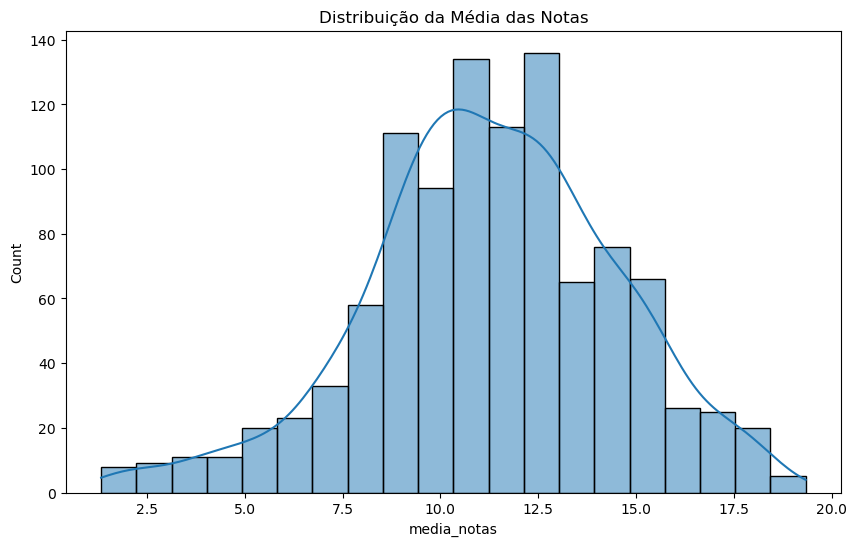

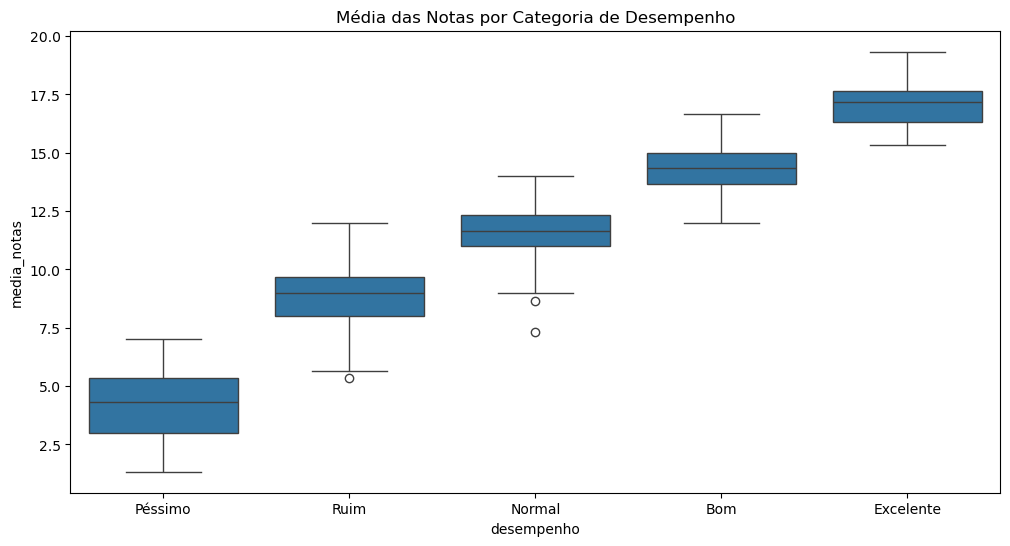

In [32]:
# Distribuição
plt.figure(figsize=(10, 6))
sns.histplot(df_alunos['media_notas'], bins=20, kde=True)
plt.title('Distribuição da Média das Notas')
plt.show()

# Boxplot por desempenho
plt.figure(figsize=(12, 6))
sns.boxplot(x='desempenho', y='media_notas', data=df_alunos, order=['Péssimo', 'Ruim', 'Normal', 'Bom', 'Excelente'])
plt.title('Média das Notas por Categoria de Desempenho')
plt.show()

### 4.6.2.1. Avaliação da progresso_semestre e progresso_final

In [33]:
print("Progresso no Semestre:")
print(df_alunos['progresso_semestre'].describe())
print("\nProgresso Final:")
print(df_alunos['progresso_final'].describe())

# Correlação entre progressos
print("\nCorrelação entre progressos:")
print(df_alunos[['progresso_semestre', 'progresso_final']].corr())

Progresso no Semestre:
count    1044.000000
mean        0.032567
std         1.691129
min       -12.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max        11.000000
Name: progresso_semestre, dtype: float64

Progresso Final:
count    1044.000000
mean        0.095785
std         1.613231
min       -10.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: progresso_final, dtype: float64

Correlação entre progressos:
                    progresso_semestre  progresso_final
progresso_semestre            1.000000        -0.052102
progresso_final              -0.052102         1.000000


### 4.6.2.2. Avaliação da progresso_semestre e progresso_final "Visual"

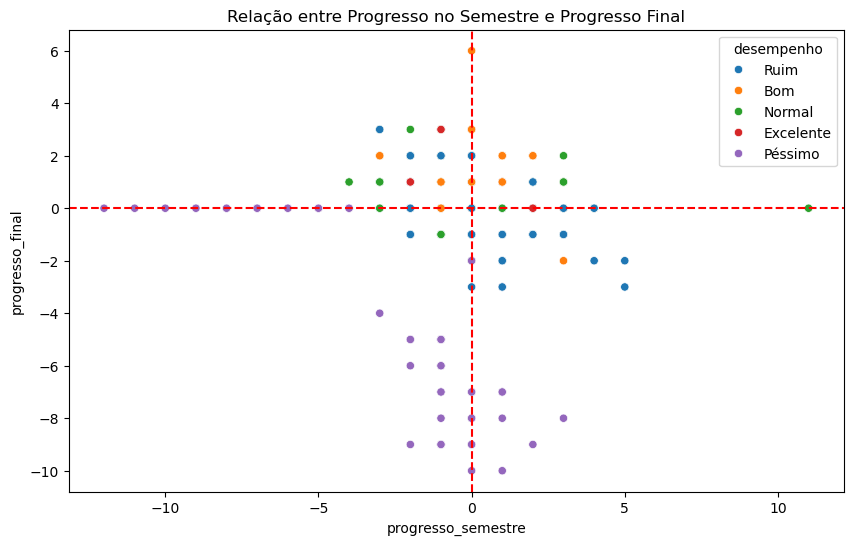

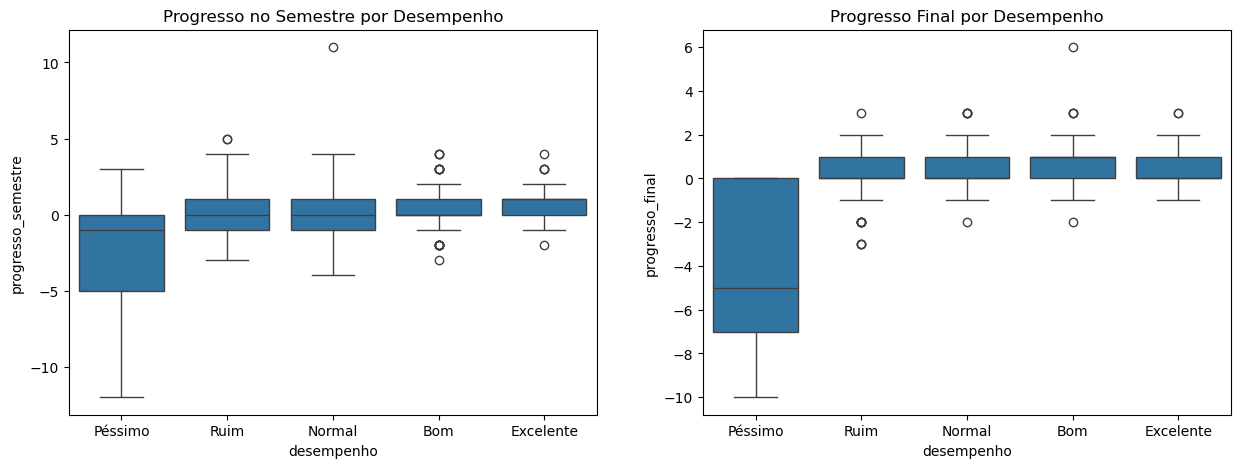

In [34]:
# Scatter plot dos dois progressos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='progresso_semestre', y='progresso_final', hue='desempenho', data=df_alunos)
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.title('Relação entre Progresso no Semestre e Progresso Final')
plt.show()

# Distribuição dos progressos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='desempenho', y='progresso_semestre', data=df_alunos, ax=axes[0], order=['Péssimo', 'Ruim', 'Normal', 'Bom', 'Excelente'])
sns.boxplot(x='desempenho', y='progresso_final', data=df_alunos, ax=axes[1], order=['Péssimo', 'Ruim', 'Normal', 'Bom', 'Excelente'])
axes[0].set_title('Progresso no Semestre por Desempenho')
axes[1].set_title('Progresso Final por Desempenho')
plt.show()

### 4.6.3.1. Avaliação por Total_alcool

In [35]:
print(df_alunos['total_alcool'].describe())
print("\nConsumo médio por desempenho:")
print(df_alunos.groupby('desempenho')['total_alcool'].mean().sort_index())

count    1044.000000
mean        3.778736
std         1.988434
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: total_alcool, dtype: float64

Consumo médio por desempenho:
desempenho
Bom          3.316964
Excelente    3.057143
Normal       3.828338
Péssimo      4.063492
Ruim         4.146875
Name: total_alcool, dtype: float64


### 4.6.3.2. Avaliação por Total_alcool "Visual"

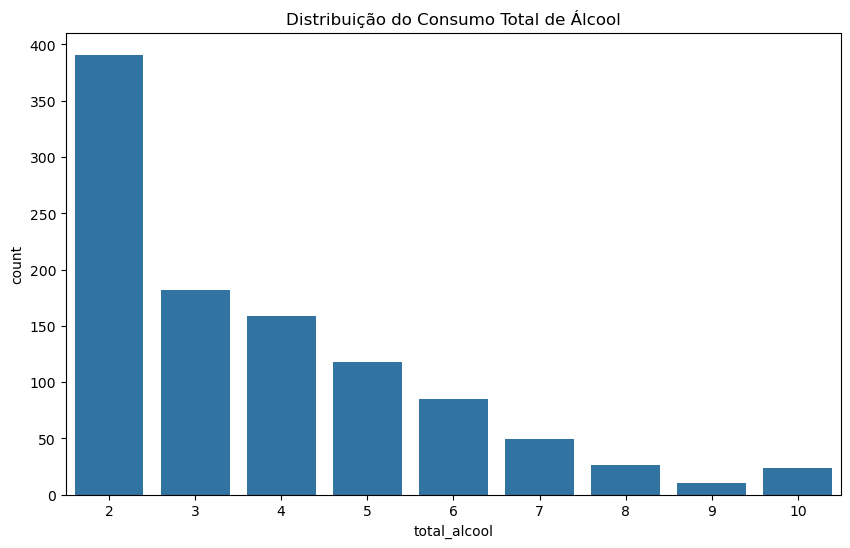

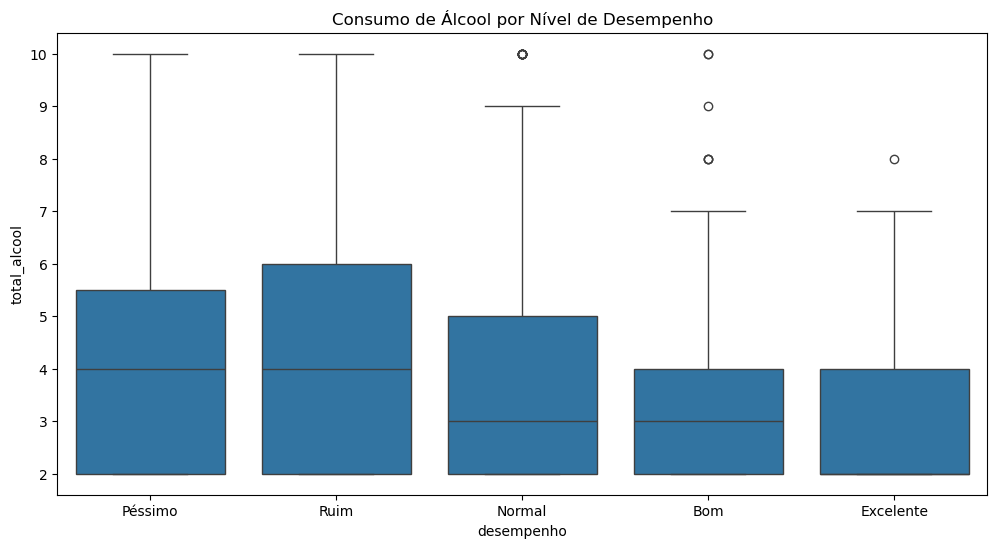

In [36]:
# Distribuição do consumo
plt.figure(figsize=(10, 6))
sns.countplot(x='total_alcool', data=df_alunos)
plt.title('Distribuição do Consumo Total de Álcool')
plt.show()

# Relação com desempenho
plt.figure(figsize=(12, 6))
sns.boxplot(x='desempenho', y='total_alcool', data=df_alunos, order=['Péssimo', 'Ruim', 'Normal', 'Bom', 'Excelente'])
plt.title('Consumo de Álcool por Nível de Desempenho')
plt.show()

### 4.6.4.1. Analise Cruzadas

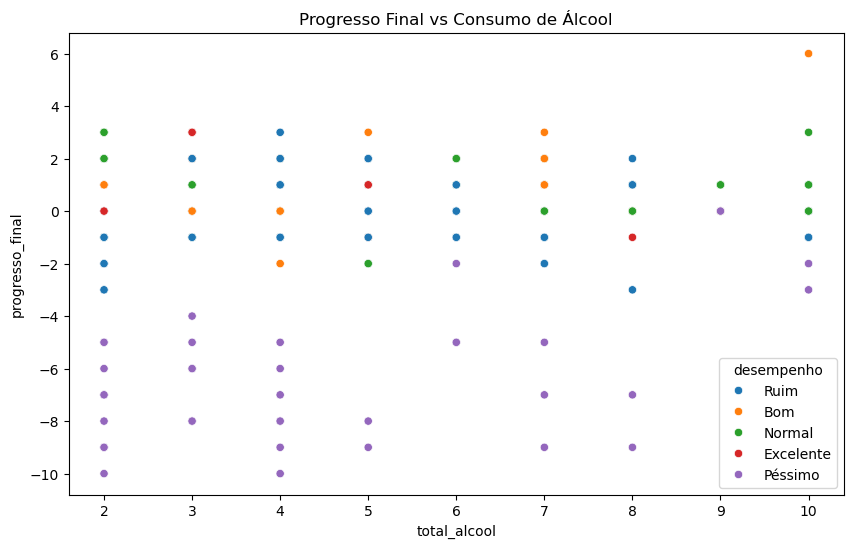

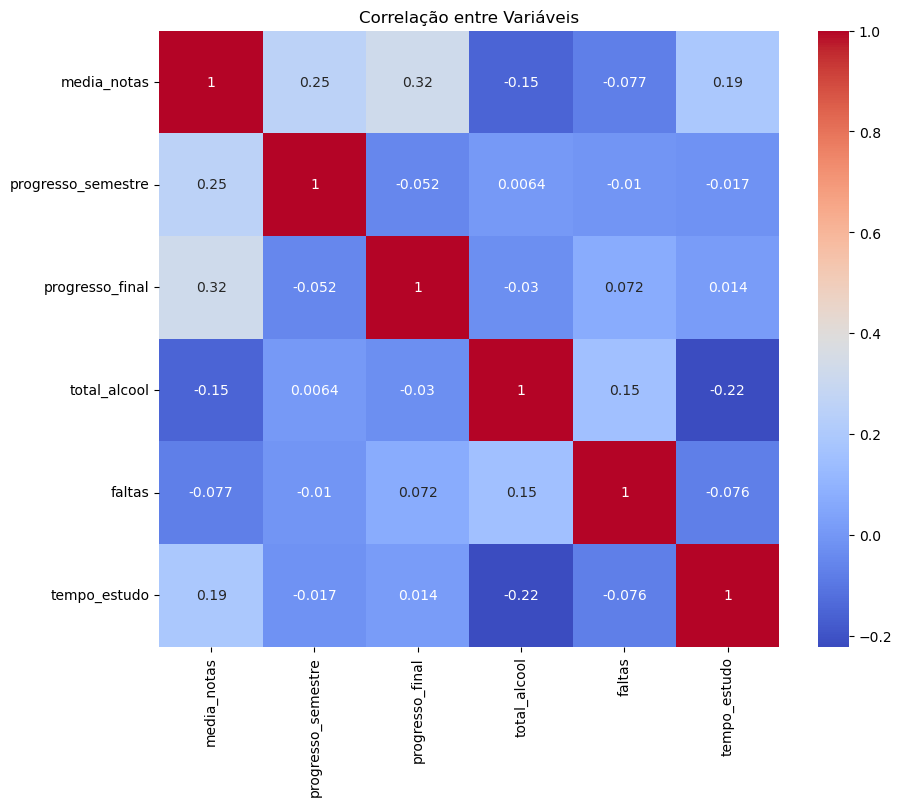

In [37]:
# Progresso vs Consumo de Álcool
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_alcool', y='progresso_final', hue='desempenho', data=df_alunos)
plt.title('Progresso Final vs Consumo de Álcool')
plt.show()

# Matriz de correlação das novas features
plt.figure(figsize=(10, 8))
sns.heatmap(df_alunos[['media_notas', 'progresso_semestre', 'progresso_final', 'total_alcool', 'faltas', 'tempo_estudo']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

## Os Gráficos Podem Revelar:
Progresso Acadêmico:

- Se a maioria dos pontos no scatter plot estiver no quadrante superior direito (progresso positivo em ambos os períodos), indica que alunos que melhoram continuam melhorando.

- Pontos no quadrante inferior esquerdo podem indicar alunos em risco.

Consumo de Álcool:

- Um boxplot mostrando médias de consumo significativamente maiores para "Péssimo" e "Ruim" sugeriria uma relação negativa entre álcool e desempenho.

Médias vs Desempenho:

- O histograma de media_notas pode revelar se a distribuição é bimodal (sugerindo dois grupos distintos de alunos).

- Boxplots por categoria mostrarão se há sobreposição entre as faixas de desempenho.

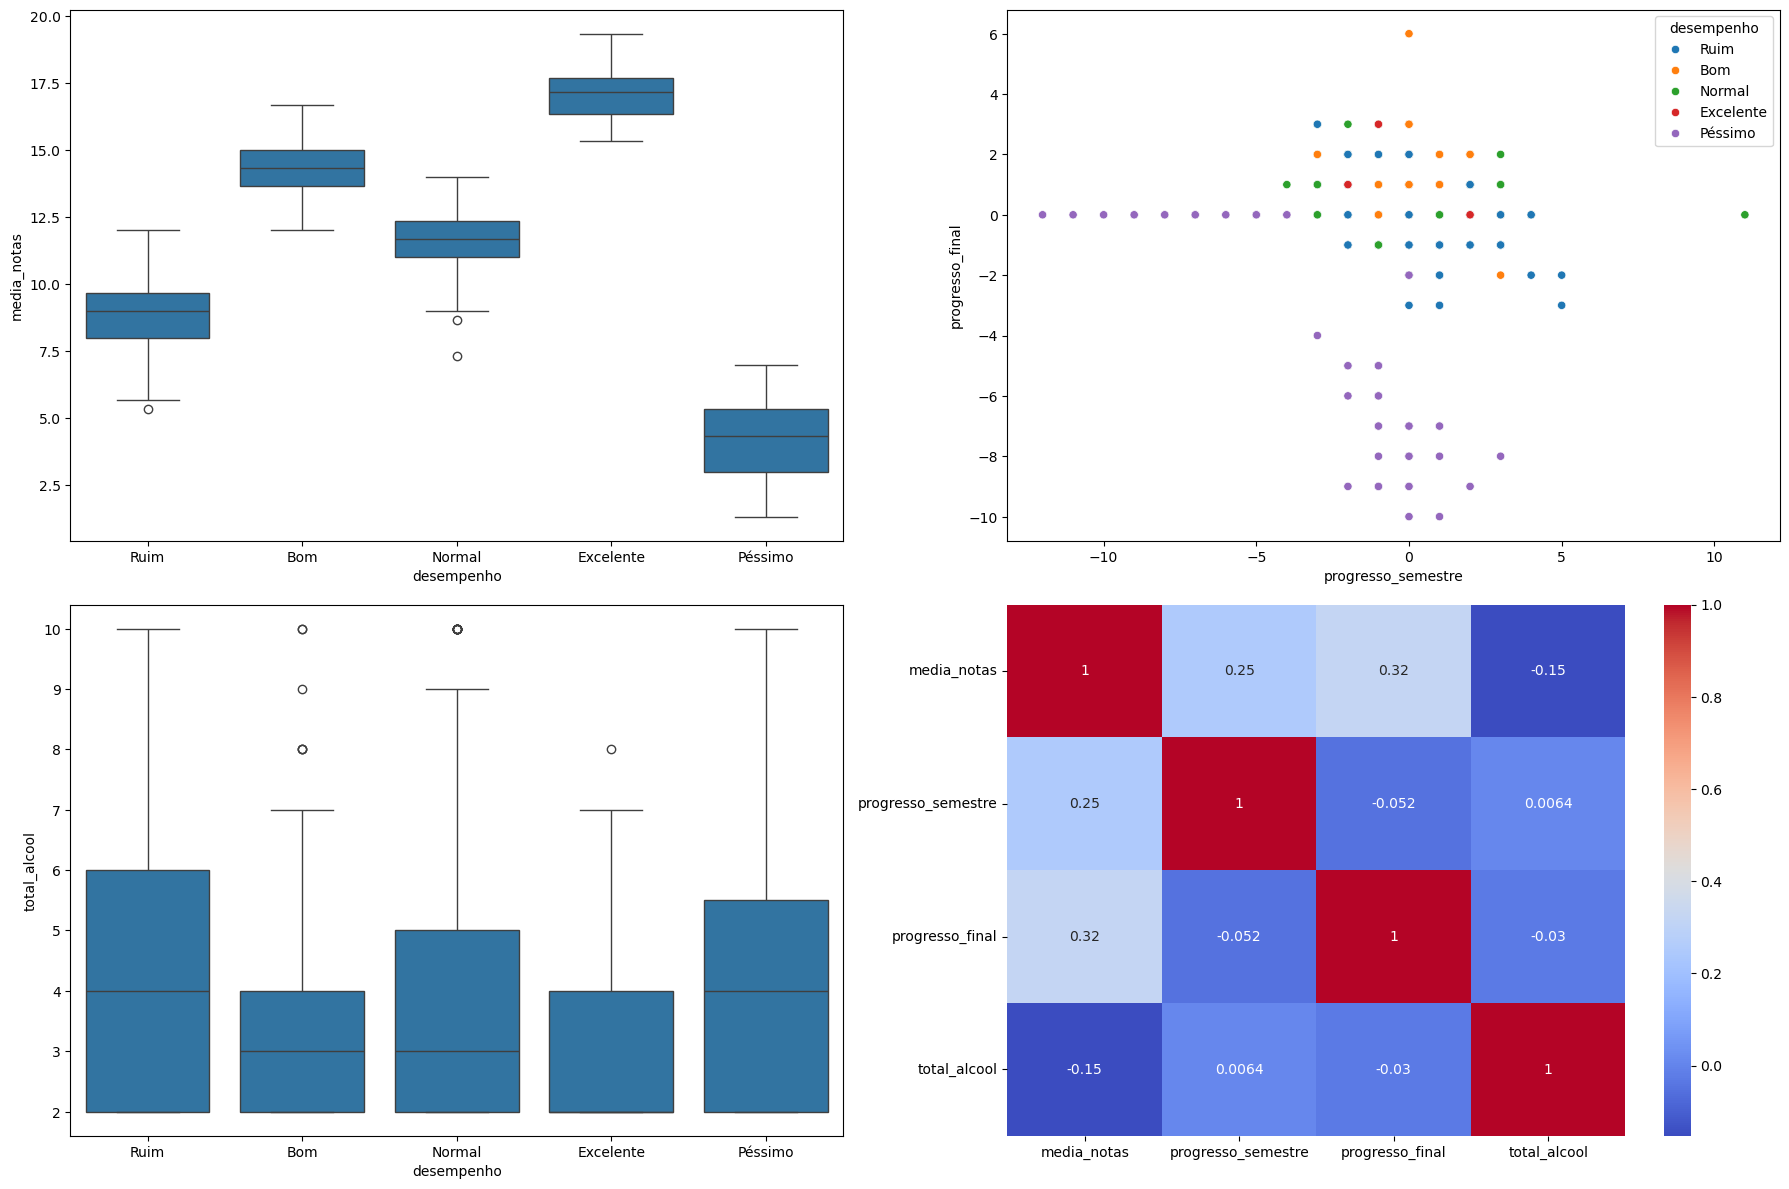

In [38]:
# Painel resumo
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(x='desempenho', y='media_notas', data=df_alunos, ax=ax1)

ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(x='progresso_semestre', y='progresso_final', hue='desempenho', data=df_alunos, ax=ax2)

ax3 = fig.add_subplot(gs[1, 0])
sns.boxplot(x='desempenho', y='total_alcool', data=df_alunos, ax=ax3)

ax4 = fig.add_subplot(gs[1, 1])
sns.heatmap(df_alunos[['media_notas', 'progresso_semestre', 'progresso_final', 'total_alcool']].corr(), 
            annot=True, cmap='coolwarm', ax=ax4)

plt.tight_layout()
plt.show()

## 4.7. Análise de Interações

Verificar interações entre variáveis

### 4.7.1. Análise de Interação Álcool vs Saídas - "Estatística"

In [39]:
df_alunos[['total_alcool', 'saidas']].describe()

,total_alcool,saidas
count,1044.000000,1044.000000
mean,3.778736,3.156130
std,1.988434,1.152575
min,2.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,5.000000,4.000000
max,10.000000,5.000000


In [40]:
# 1. Criar os grupos
df_alunos['nivel_alcool'] = pd.cut(df_alunos['total_alcool'], 
                                  bins=[0, 2, 4, 10], 
                                  labels=['Baixo', 'Moderado', 'Alto']).astype(str)

df_alunos['frequencia_saidas'] = pd.cut(df_alunos['saidas'], 
                                      bins=[0, 2, 4, 5], 
                                      labels=['Poucas', 'Médias', 'Muitas']).astype(str)

# 2. Análise de interação
interaction_table = df_alunos.pivot_table(
    index='nivel_alcool',
    columns='frequencia_saidas',
    values='nota3',
    aggfunc='mean'
)

print("Nota Média por Combinação:")
display(interaction_table)

Nota Média por Combinação:


frequencia_saidas,Muitas,Médias,Poucas
nivel_alcool,,,
Alto,10.098901,10.742857,11.326087
Baixo,10.310345,11.744681,12.040230
Moderado,10.627907,11.788945,11.272727


### 4.7.1. Análise de Interação Álcool vs Saídas - "Visualização"

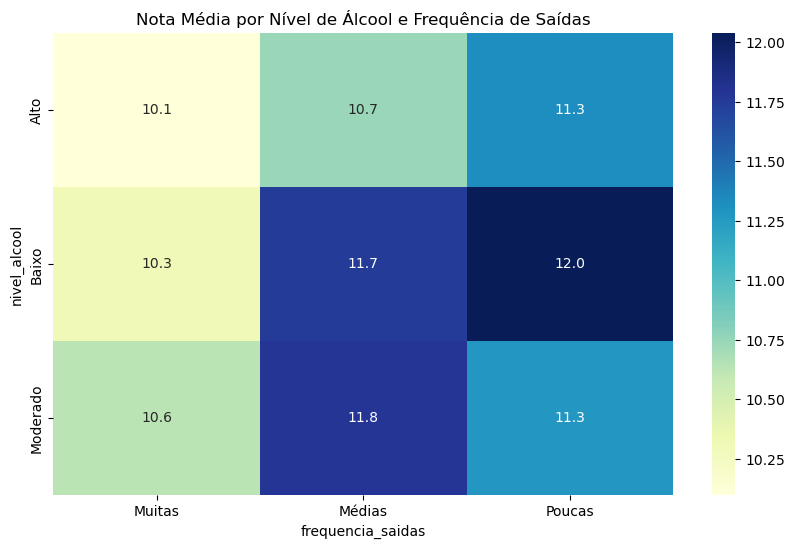

In [41]:
# 3. Visualização
plt.figure(figsize=(10, 6))
sns.heatmap(interaction_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Nota Média por Nível de Álcool e Frequência de Saídas')
plt.show()

### 4.7.2. Analise do Tempo de Estudo vs Apoio da Família - "Estatística"

In [42]:
df_alunos[['tempo_estudo', 'nota3']].describe()

,tempo_estudo,nota3
count,1044.000000,1044.000000
mean,1.970307,11.341954
std,0.834353,3.864796
min,1.000000,0.000000
25%,1.000000,10.000000
50%,2.000000,11.000000
75%,2.000000,14.000000
max,4.000000,20.000000


In [43]:
# Cruzar as duas variáveis
cross_tab = pd.crosstab(
    index=df_alunos['tempo_estudo'],
    columns=df_alunos['apoio_familia'],
    values=df_alunos['nota3'],
    aggfunc='mean'
)
print("Nota Média (G3) por Combinação:")
display(cross_tab)

Nota Média (G3) por Combinação:


apoio_familia,no,yes
tempo_estudo,,
1,10.779874,10.379747
2,11.222857,11.396341
3,12.962963,12.259259
4,11.125000,12.673913


### 4.7.2. Analise do Tempo de Estudo vs Apoio da Família - "Visualização"

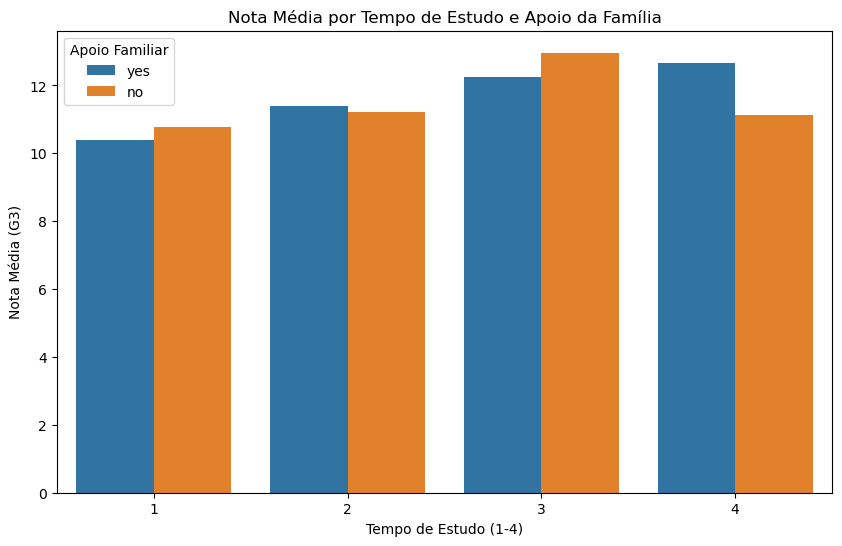

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='tempo_estudo', 
    y='nota3', 
    hue='apoio_familia',
    data=df_alunos,
    ci=None,
    order=sorted(df_alunos['tempo_estudo'].unique())
)
plt.title('Nota Média por Tempo de Estudo e Apoio da Família')
plt.ylabel('Nota Média (G3)')
plt.xlabel('Tempo de Estudo (1-4)')
plt.legend(title='Apoio Familiar')
plt.show()

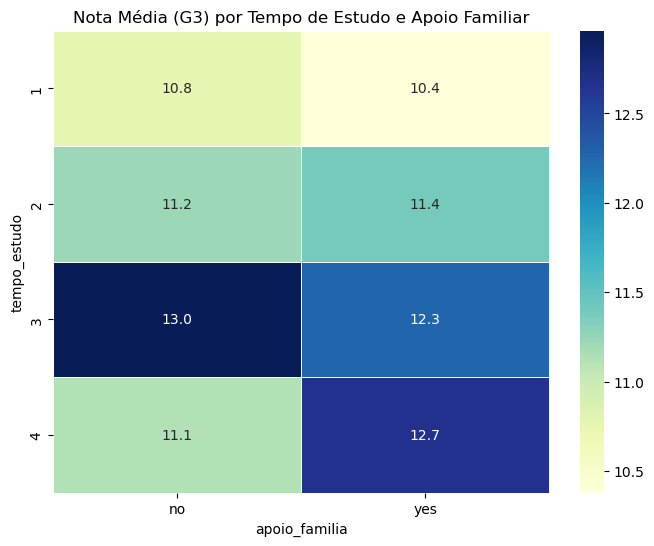

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    cross_tab, 
    annot=True, 
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=.5
)
plt.title('Nota Média (G3) por Tempo de Estudo e Apoio Familiar')
plt.show()

### 4.7.3. Analise do uso da Internet vs Atividades Extracurriculares - "Estatística"

In [46]:
# Criar tabela de contingência
contingency_table = pd.crosstab(
    index=[df_alunos['acesso_internet'], df_alunos['atividades_extracurriculares']],
    columns=df_alunos['desempenho'],
    normalize='index'
) * 100

print("Distribuição de Desempenho por Combinação:")
display(contingency_table)

Distribuição de Desempenho por Combinação:


desempenho                                          Bom  Excelente     Normal  \
acesso_internet atividades_extracurriculares                                    
no              no                             8.000000   3.200000  40.000000   
                yes                           19.565217   6.521739  32.608696   
yes             no                            22.084367   7.444169  35.483871   
                yes                           25.235849   7.075472  33.962264   

desempenho                                     Péssimo       Ruim  
acesso_internet atividades_extracurriculares                       
no              no                            5.600000  43.200000  
                yes                           9.782609  31.521739  
yes             no                            5.955335  29.032258  
                yes                           5.424528  28.301887

### 4.7.3. Analise do uso da Internet vs Atividades Extracurriculares - "Visualização"

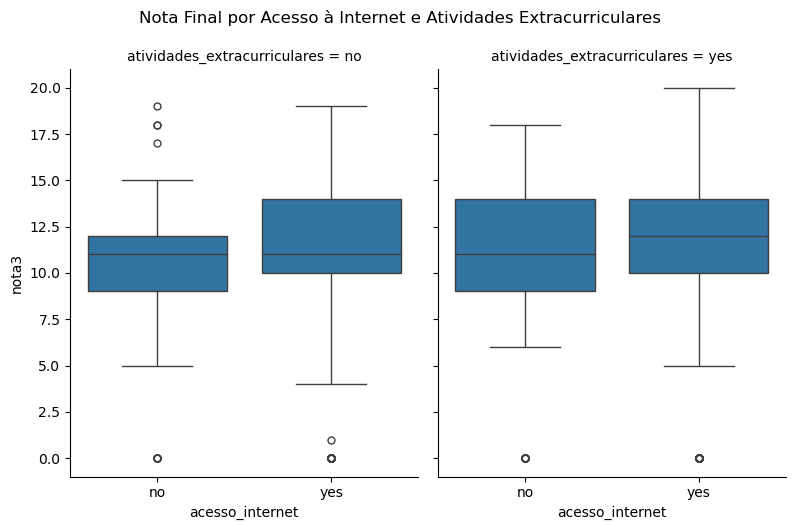

In [47]:
g = sns.catplot(
    x='acesso_internet',
    y='nota3',
    col='atividades_extracurriculares',
    kind='box',
    data=df_alunos,
    height=5,
    aspect=0.8
)
g.fig.suptitle('Nota Final por Acesso à Internet e Atividades Extracurriculares', y=1.05)
plt.show()

In [48]:
from scipy.stats import chi2_contingency

def analyze_interaction(var1, var2, target, df, alpha=0.05):
    # Criar tabela
    table = pd.crosstab(
        index=df[var1],
        columns=df[var2],
        values=df[target] > df[target].median(),
        aggfunc='sum'
    )
    
    # Teste
    chi2, p, dof, expected = chi2_contingency(table)
    
    # Resultado
    print(f"Variável 1: {var1}\nVariável 2: {var2}\n")
    print("Tabela Observada:")
    display(table)
    print("\nTabela Esperada sob Independência:")
    display(pd.DataFrame(expected, index=table.index, columns=table.columns))
    
    print(f"\nEstatística Chi²: {chi2:.3f}")
    print(f"Valor-p: {p:.4f}")
    
    if p < alpha:
        print(f"\nConclusão: Há interação significativa (p < {alpha})")
    else:
        print(f"\nConclusão: Não há evidência de interação (p ≥ {alpha})")
    
    return table

# Uso:
analyze_interaction('acesso_internet', 'atividades_extracurriculares', 'nota3', df_alunos)

Variável 1: acesso_internet
Variável 2: atividades_extracurriculares

Tabela Observada:


atividades_extracurriculares,no,yes
acesso_internet,,
no,39,43
yes,198,230



Tabela Esperada sob Independência:


atividades_extracurriculares,no,yes
acesso_internet,,
no,38.105882,43.894118
yes,198.894118,229.105882



Estatística Chi²: 0.009
Valor-p: 0.9241

Conclusão: Não há evidência de interação (p ≥ 0.05)


atividades_extracurriculares,no,yes
acesso_internet,,
no,39,43
yes,198,230


## 4.8. Pairplot para Variáveis Numéricas

<Figure size 1200x1000 with 0 Axes>

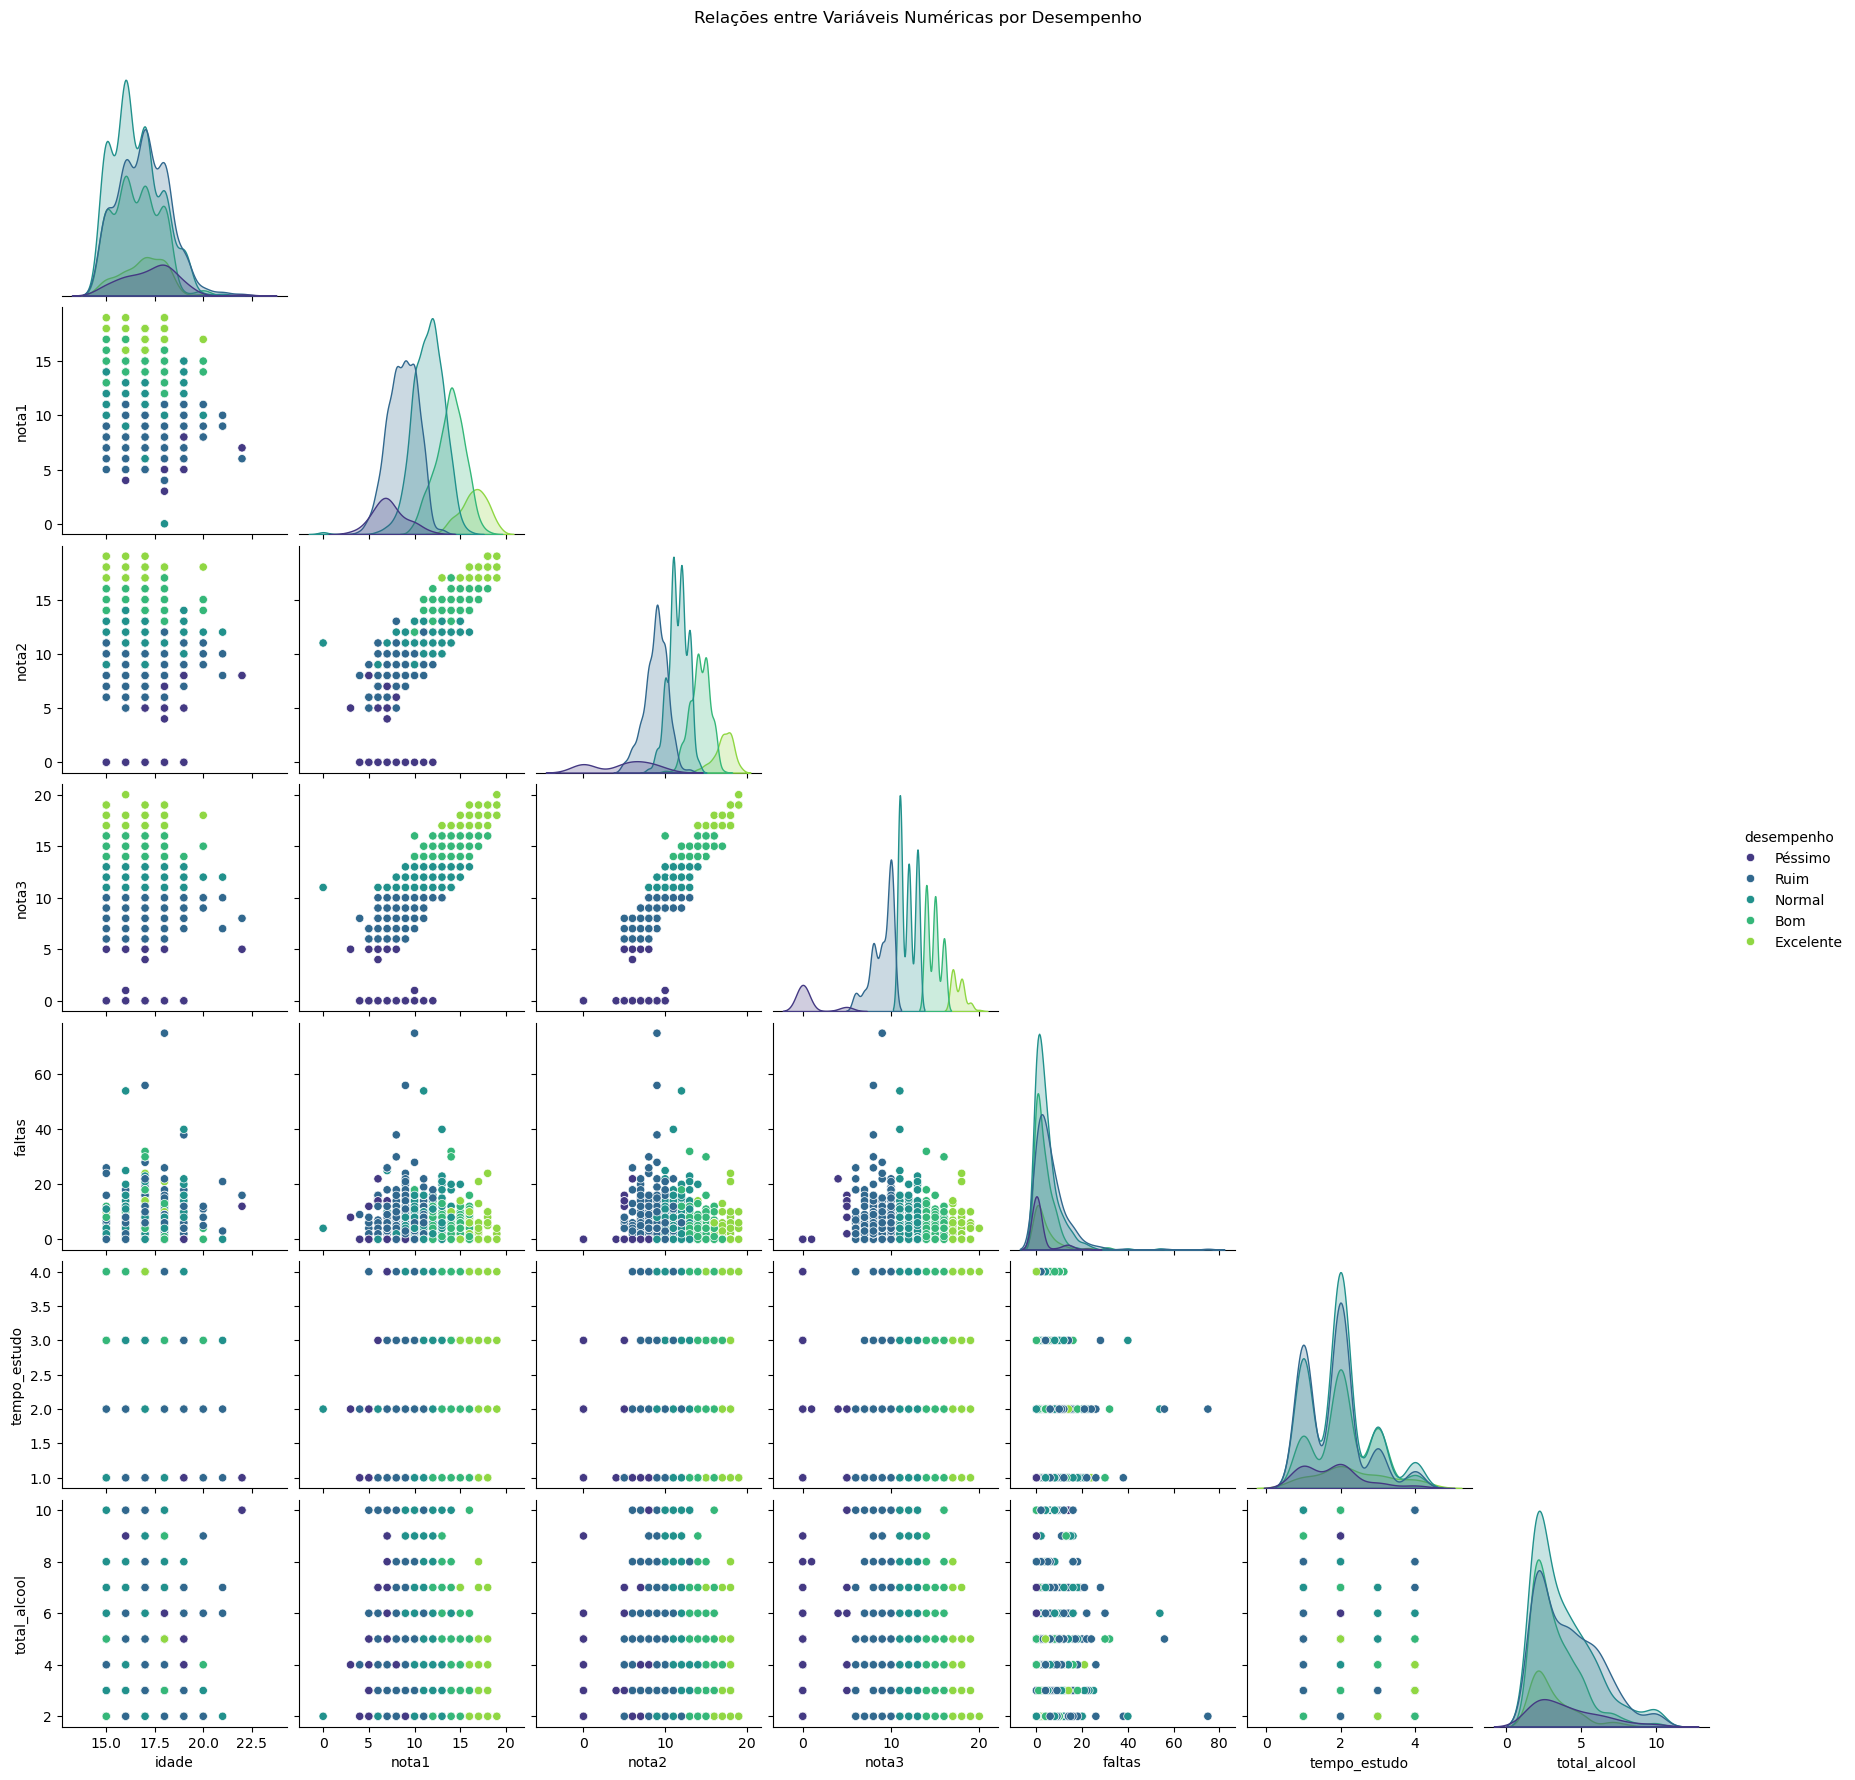

In [49]:
# Selecionar variáveis numéricas relevantes
numericas = ['idade', 'nota1', 'nota2', 'nota3', 'faltas', 'tempo_estudo', 'total_alcool']

plt.figure(figsize=(12, 10))
sns.pairplot(
    data=df_alunos,
    vars=numericas,
    hue='desempenho',
    hue_order=['Péssimo', 'Ruim', 'Normal', 'Bom', 'Excelente'],
    palette='viridis',
    corner=True  # Mostra apenas metade dos gráficos
)
plt.suptitle('Relações entre Variáveis Numéricas por Desempenho', y=1.02)
plt.show()

## 4.9. Heatmap de Correlação (Focado)

In [ ]:
# Variáveis selecionadas baseadas na importância do Random Forest
vars_importantes = ['nota1', 'nota2', 'faltas', 'reprovacoes', 'tempo_estudo', 
                   'escolaridade_mae', 'total_alcool', 'media_notas']

plt.figure(figsize=(10, 8))
sns.heatmap(
    df_alunos[vars_importantes].corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=.5
)
plt.title('Correlação entre Variáveis-Chave', pad=20)
plt.xticks(rotation=45)
plt.show()

In [ ]:
## 4.10. Desempenho por Sexo e Acesso à Internet

In [ ]:
g = sns.catplot(
    x='sexo',
    y='nota3',
    col='acesso_internet',
    hue='desempenho',
    data=df_alunos,
    kind='box',
    height=5,
    aspect=0.8,
    palette='Set2',
    order=['F', 'M'],
    hue_order=['Péssimo', 'Ruim', 'Normal', 'Bom', 'Excelente']
)
g.fig.suptitle('Desempenho por Sexo e Acesso à Internet', y=1.05)
plt.show()

## 4.11. Análise por Grupos

### 4.11.1. Apoio Escolar (com/sem)

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='apoio_escola',
    y='nota3',
    hue='desempenho',
    data=df_alunos,
    split=True,
    inner='quartile',
    palette='muted'
)
plt.title('Distribuição de Notas por Apoio Escolar e Desempenho')
plt.xlabel('Recebe Apoio Escolar?')
plt.ylabel('Nota Final (G3)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### 4.11.2. Atividades Extracurriculares

In [ ]:
# Tabela de contingência
tab_extracurriculares = pd.crosstab(
    index=df_alunos['atividades_extracurriculares'],
    columns=df_alunos['desempenho'],
    normalize='index'
) * 100

# Gráfico de barras empilhadas
tab_extracurriculares.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#d62728', '#ff9896', '#c5b0d5', '#aec7e8', '#1f77b4']
)
plt.title('Distribuição de Desempenho por Atividades Extracurriculares')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Faz Atividades Extracurriculares?')
plt.xticks(rotation=0)
plt.legend(title='Desempenho', bbox_to_anchor=(1.05, 1))
plt.show()

### 4.11.3. Níveis de Consumo de Álcool

In [ ]:
# Criar categorias de consumo
df_alunos['nivel_alcool'] = pd.cut(
    df_alunos['total_alcool'],
    bins=[0, 2, 4, 10],
    labels=['Baixo', 'Moderado', 'Alto']
)

# Gráfico de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_alunos,
    x='nota3',
    hue='nivel_alcool',
    hue_order=['Baixo', 'Moderado', 'Alto'],
    fill=True,
    alpha=0.3,
    palette='viridis'
)
plt.title('Distribuição de Notas por Nível de Consumo de Álcool')
plt.xlabel('Nota Final (G3)')
plt.ylabel('Densidade')
plt.show()

### 4.11.4. Análise Combinada Avançada

In [ ]:
# Grid de análises
g = sns.FacetGrid(
    data=df_alunos,
    row='apoio_escola',
    col='atividades_extracurriculares',
    hue='nivel_alcool',
    height=4,
    aspect=1.2,
    palette='viridis'
)
g.map(sns.scatterplot, 'tempo_estudo', 'nota3', alpha=0.7)
g.add_legend(title='Nível Álcool')
g.fig.suptitle('Relação Tempo de Estudo vs Nota Final em Diferentes Contextos', y=1.05)
plt.show()

### 2.12 Mapa de Correlação

In [ ]:
# Correlação
plt.figure(figsize=(12,10))
sns.heatmap(df_alunos.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

In [ ]:
### Verificar se tem assiciaçã estatisticamente significativa entre duas variáveis

In [ ]:
tabela_contagem = pd.crosstab(df_alunos['apoio_familia'], df_alunos['quer_ensino_superior'])
print("Tabela de Contagem:")
display(tabela_contagem)
chi2, p, dof, expected = chi2_contingency(tabela_contagem)
print(f"\nValor-p do Qui-Quadrado: {p:.4f}")
if p < 0.05:
    print("Há associação estatisticamente significativa.")
else:
    print("Não há evidência de associação estatisticamente significativa.")

In [ ]:
### Análise de Variância (ANOVA) ou Teste t para Numéricas vs. Categóricas

In [ ]:
from scipy.stats import f_oneway
# Preparar os dados: uma série de notas para cada grupo de desempenho
grupos_desempenho = [df_alunos['media_notas'][df_alunos['desempenho'] == cat] for cat in df_alunos['desempenho'].unique()]
f_stat, p_value = f_oneway(*grupos_desempenho) # O '*' desempacota a lista de séries
print(f"ANOVA para media_notas vs desempenho: F-statistic={f_stat:.2f}, p-value={p_value:.4f}")

In [ ]:
### Teste t: Se a variável categórica tem apenas 2 grupos

In [ ]:
from scipy.stats import ttest_ind
grupo_m = df_alunos['media_notas'][df_alunos['sexo'] == 'M']
grupo_f = df_alunos['media_notas'][df_alunos['sexo'] == 'F']
t_stat, p_value = ttest_ind(grupo_m, grupo_f, nan_policy='omit') # nan_policy se houver NaNs
print(f"Teste t para media_notas vs sexo: t-statistic={t_stat:.2f}, p-value={p_value:.4f}")

In [ ]:
### Análise de Interação mais Detalhada

In [ ]:
interaction_table.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Nota Média por Nível de Álcool e Frequência de Saídas')
plt.ylabel('Nota Média (nota3)')
plt.xlabel('Nível de Álcool')
plt.grid(True)
plt.show()

# 3. Tratamento dos dados 

### 3. Definir Regras de Tratamento
Com base no que já vimos no seu .describe() e no que aparecer nos boxplots:

- Variável	Regra sugerida
- faltas	Remover alunos com faltas > 30
- idade	Aceitar idade até 20 anos (ou deixar até 22 se quiser)
- nota1, nota2, nota3	Analisar alunos com nota3 = 0 (podem ser casos especiais)
- reprovacoes	Aceitar até 3, mas se quiser ser mais rigoroso, limitar a 2

In [ ]:
### 3.1. Analise da distribuição das Faltas, Idades, Nota 1, Nota 2, Nota 3 e reprovações

In [ ]:
# Lista de variáveis que a gente quer olhar
variaveis = ['faltas', 'idade', 'nota1', 'nota2', 'nota3', 'reprovacoes']

# Criar boxplots para cada variável
for var in variaveis:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_alunos[var])
    plt.title(f'Distribuição de {var}')
    plt.show()

In [ ]:
### 3.2. Tratamentos dos  campos com outlies

In [ ]:
# Filtrar alunos com faltas exageradas - tem alunos com 75 faltas - 30 é um numero que eu excolhi
df_alunos = df_alunos[df_alunos['faltas'] <= 30]

# Filtrar alunos com idade acima do normal (opcional)
df_alunos = df_alunos[df_alunos['idade'] <= 20]

# Se quiser, tratar casos de nota3 = 0 (opcional, cuidado)
# df_alunos = df_alunos[df_alunos['nota3'] > 0]

In [ ]:
### 3.3. Achar o numero máximo de falta pelos quartis

In [ ]:
# Calcular os quartis
Q1 = df_alunos['faltas'].quantile(0.25)
Q3 = df_alunos['faltas'].quantile(0.75)
IQR = Q3 - Q1

# Limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")

# Filtrar alunos dentro do intervalo normal  -- Usar esse Dataset caso queira usar esse calculo 
df_alunos_filtrado = df_alunos[(df_alunos['faltas'] >= limite_inferior) & (df_alunos['faltas'] <= limite_superior)]


O numero calcula do para o corte das falta seria "15" que pode ser alterado no item 3.1

In [ ]:
### 3.4. Verificação pós tratamento 

In [ ]:
df_alunos.describe()

In [ ]:
### 3.5. Gráfico pós tratamento

In [ ]:
for var in variaveis:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_alunos[var])
    plt.title(f'Distribuição de {var} - Pós Limpeza')
    plt.show()

### 3.6. Variáveis Excluídas:  (vazamento de informação)

- nota1, nota2, nota3: São o próprio target disfarçado

- desempenho: É o target

- media_notas, progresso_*: Derivados diretos das notas

In [ ]:
# Separação das colunas que vão ser utilizadas no modelo
variaveis_remover = [
    'nota1', 'nota2', 'nota3',
    'desempenho', 
    'media_notas',
    'progresso_semestre',
    'progresso_final'
]

features_seguras = [
    # Demográficas
    'escola', 'sexo', 'idade', 'tipo_endereco', 'tamanho_familia',
    
    # Familiares
    'status_pais', 'escolaridade_mae', 'escolaridade_pai',
    'trabalho_mae', 'trabalho_pai', 'responsavel',
    
    # Acadêmicas
    'tempo_transporte', 'tempo_estudo', 'reprovacoes',
    'apoio_escola', 'apoio_familia', 'aulas_particulares',
    
    # Comportamentais
    'atividades_extracurriculares', 'frequentou_creche',
    'quer_ensino_superior', 'acesso_internet', 'relacionamento',
    'relacionamento_familiar', 'tempo_livre', 'saidas',
    
    # Saúde/Hábitos
    'consumo_alcool_dia', 'consumo_alcool_fimsemana',
    'estado_saude', 'faltas',
    
    # Matéria (se relevante)
    'materia',
    
    # Variável criada sem vazamento
    'total_alcool'
]

In [ ]:
### 3.7. Valores únicos em variáves categíricas

In [ ]:
# Contar quantos valores únicos existem em cada variável categórica
for coluna in df_alunos.select_dtypes(include=['object', 'category']).columns:
    print(f"{coluna}: {df_alunos[coluna].nunique()} categorias")

In [ ]:
### 3.8. Distribuição percentual de cada categoria

In [ ]:
# Exibir a distribuição percentual de cada categoria
for coluna in df_alunos.select_dtypes(include=['object', 'category']).columns:
    print(f"\nDistribuição de {coluna}:")
    print(df_alunos[coluna].value_counts(normalize=True) * 100)

In [ ]:
### 4. Preparação para Modelagem: Separação de X e y

In [ ]:
# CRIAR DATAFRAME SEGURO (SEM VAZAMENTO)
df_seguro = df_alunos.drop(columns=variaveis_remover)

# VERIFICAÇÃO EXPLÍCITA
print("Variáveis removidas:", variaveis_remover)
print("\nVariáveis restantes no dataset seguro:")
print(df_seguro.columns.tolist())

In [ ]:
# X: todas as colunas, menos 'desempenho'
X = df_seguro[features_seguras].copy()

# y: apenas a coluna 'desempenho'
y = df_alunos['desempenho']

In [ ]:
### 4.1. Dividir em treino e teste ANTES do encoding

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
### 4.2. Aplicar One-Hot Encoding nas variáveis categóricas

In [ ]:
# Lista das variáveis categóricas que vamos transformar
variaveis_categoricas = [
    col for col in [
        'escola', 'sexo', 'tipo_endereco', 'tamanho_familia', 'status_pais',
        'trabalho_mae', 'trabalho_pai', 'responsavel', 'quer_ensino_superior',
        'apoio_escola', 'apoio_familia', 'aulas_particulares', 
        'atividades_extracurriculares', 'frequentou_creche', 
        'acesso_internet', 'relacionamento', 'materia'
    ] 
    if col in X_train.columns  # Filtra apenas colunas existentes
]

# Aplicar One-Hot Encoding apenas nas colunas seguras (APENAS NO TREINO)
X_train_encoded = pd.get_dummies(
    X_train,
    columns=variaveis_categoricas,
    drop_first=True,
    dtype=int
)

# GARANTIR QUE O TESTE TENHA AS MESMAS COLUNAS
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Visualizar o resultado
display(X_train_encoded.head())
print("\nFormato final do dataframe:", X_train_encoded.shape)

In [ ]:
# 8. VERIFICAÇÃO FINAL (AGORA INCLUINDO y)
print("\n✔ Dimensões finais:")
print(f"X_train: {X_train_encoded.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test_encoded.shape}, y_test: {y_test.shape}")

# 9. VERIFICAÇÃO DE BALANCEAMENTO
print("\n✔ Distribuição das classes:")
print("Treino:", y_train.value_counts(normalize=True))
print("Teste:", y_test.value_counts(normalize=True))

# 10. VISUALIZAÇÃO (OPCIONAL)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
y_train.value_counts().plot(kind='bar', title='Distribuição y_train')
plt.subplot(1,2,2)
y_test.value_counts().plot(kind='bar', title='Distribuição y_test')
plt.tight_layout()
plt.show()

In [ ]:
---  Para aqui

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Certifique-se de que pandas está importado

# Identificar colunas numéricas (após one-hot encoding)
# Cuidado: Isso assume que as colunas originais numéricas ainda são numéricas
# e as novas colunas do get_dummies são 0/1 (que geralmente não precisam de scaling)
colunas_numericas = X_train_encoded.select_dtypes(include=['int64', 'float64', 'int32']).columns
# Talvez refinar esta lista para excluir as colunas dummy 0/1 se select_dtypes as pegar

# Lista mais explícita (adapte conforme suas colunas finais em X_train_encoded):
colunas_para_escalonar = [
    'idade', 'escolaridade_mae', 'escolaridade_pai', 'tempo_transporte',
    'tempo_estudo', 'reprovacoes', 'relacionamento_familiar', 'tempo_livre',
    'saidas', 'consumo_alcool_dia', 'consumo_alcool_fimsemana',
    'estado_saude', 'faltas', 'total_alcool' # Adicione/remova conforme necessário
]
# Garanta que essas colunas realmente existem em X_train_encoded
colunas_para_escalonar = [col for col in colunas_para_escalonar if col in X_train_encoded.columns]


scaler = StandardScaler()

# Fitar APENAS no treino
scaler.fit(X_train_encoded[colunas_para_escalonar])

# Transformar treino e teste
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[colunas_para_escalonar] = scaler.transform(X_train_encoded[colunas_para_escalonar])
X_test_scaled[colunas_para_escalonar] = scaler.transform(X_test_encoded[colunas_para_escalonar])

# Agora use X_train_scaled e X_test_scaled para treinar e avaliar seus modelos

In [ ]:
### Executa o RandomForest Padrão

In [ ]:
modelo_bal = RandomForestClassifier(random_state=42)
modelo_bal.fit(X_train_scaled, y_train)
print(classification_report(y_test, modelo_bal.predict(X_test_scaled)))

In [ ]:
### Executa o RandomForest com class_weight='balanced'

In [ ]:
modelo_bal = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_bal.fit(X_train_scaled, y_train)
print(classification_report(y_test, modelo_bal.predict(X_test_scaled)))

In [ ]:
### Procura o melhor parametro para o RandomForest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint # Para gerar números inteiros aleatórios

# Defina o modelo
rf = RandomForestClassifier(random_state=42)

# Defina o espaço de busca de hiperparâmetros
param_dist = {
    'n_estimators': randint(100, 500), # Inteiros aleatórios entre 100 e 500
    'max_depth': [None, 10, 20, 30, 40, 50], # Lista de opções
    'min_samples_split': randint(2, 11), # Inteiros aleatórios entre 2 e 10
    'min_samples_leaf': randint(1, 11), # Inteiros aleatórios entre 1 e 10
    'max_features': ['sqrt', 'log2', None] # Lista de opções
    # 'class_weight': [None, 'balanced'] # Pode incluir aqui também!
}

# Configure a busca aleatória
# n_iter: quantas combinações aleatórias testar
# cv: número de folds da validação cruzada
# scoring: qual métrica usar para escolher o melhor (ex: 'accuracy', 'f1_weighted')
# n_jobs: -1 para usar todos os processadores disponíveis (acelera)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50, # Testar 50 combinações (ajuste conforme seu tempo)
    cv=5,      # Validação cruzada com 5 folds
    scoring='f1_weighted', # Otimizar pelo F1 ponderado (bom para desbalanceamento)
    random_state=42,
    n_jobs=-1,
    verbose=2 # Mostra o progresso
)

# Execute a busca (use os dados escalonados se aplicou o scaling)
# random_search.fit(X_train_scaled, y_train) # Se escalonou
random_search.fit(X_train_encoded, y_train) # Se não escalonou

# Veja os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# Veja o melhor score na validação cruzada
print("\nMelhor score (F1 Weighted) na validação cruzada:")
print(random_search.best_score_)

# Use o melhor modelo encontrado para fazer previsões
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test_encoded) # Ou X_test_scaled

# Avalie o melhor modelo no conjunto de teste
from sklearn.metrics import classification_report
print("\nRelatório de classificação no teste (com melhor modelo):")
print(classification_report(y_test, y_pred_best))

In [ ]:
------ Ate aqui

In [ ]:
!pip install lightgbm

In [ ]:
# Exemplo com LightGBM
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train) # Use dados escalonados
y_pred_lgbm = lgbm.predict(X_test_scaled)
print("LightGBM Report:")
print(classification_report(y_test, y_pred_lgbm))

# Poderia fazer RandomizedSearchCV para LGBM também!

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000) # max_iter pode precisar ser aumentado
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))

In [ ]:
### RobustScaler

In [ ]:
# from sklearn.preprocessing import StandardScaler # Comente ou remova esta linha
from sklearn.preprocessing import RobustScaler # Adicione esta linha
import pandas as pd

# ... (seu código para definir colunas_para_escalonar continua o mesmo) ...
colunas_para_escalonar = [
    'idade', 'escolaridade_mae', 'escolaridade_pai', 'tempo_transporte',
    'tempo_estudo', 'reprovacoes', 'relacionamento_familiar', 'tempo_livre',
    'saidas', 'consumo_alcool_dia', 'consumo_alcool_fimsemana',
    'estado_saude', 'faltas', 'total_alcool'
]
colunas_para_escalonar = [col for col in colunas_para_escalonar if col in X_train_encoded.columns] # Renomeei a variável para clareza

# scaler = StandardScaler() # Comente ou remova esta linha
scaler = RobustScaler() # Use RobustScaler

# --- O restante do código é EXATAMENTE O MESMO ---

# Fitar APENAS no treino
scaler.fit(X_train_encoded[colunas_para_escalonar])

# Transformar treino e teste
X_train_scaled_robust = X_train_encoded.copy() # Use um novo nome para não confundir
X_test_scaled_robust = X_test_encoded.copy()   # Use um novo nome

X_train_scaled_robust[colunas_para_escalonar] = scaler.transform(X_train_encoded[colunas_para_escalonar])
X_test_scaled_robust[colunas_para_escalonar] = scaler.transform(X_test_encoded[colunas_para_escalonar])

# --- Agora treine e avalie seus modelos usando X_train_scaled_robust e X_test_scaled_robust ---

# Exemplo com LightGBM:
import lightgbm as lgb
from sklearn.metrics import classification_report

lgbm_robust = lgb.LGBMClassifier(random_state=42)
lgbm_robust.fit(X_train_scaled_robust, y_train)
y_pred_lgbm_robust = lgbm_robust.predict(X_test_scaled_robust)
print("LightGBM Report (com RobustScaler):")
print(classification_report(y_test, y_pred_lgbm_robust))

# Faça o mesmo para Logistic Regression se quiser comparar

In [ ]:
### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.metrics import classification_report

# Atenção: Aplique SMOTE SOMENTE nos dados de treino!
smote = SMOTE(random_state=42)
# Use os dados escalonados que você já tem
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_robust, y_train) # Ou X_train_scaled se preferir

print("Distribuição das classes após SMOTE (no treino):")
print(pd.Series(y_train_resampled).value_counts())

# Treine o modelo nos dados reamostrados
lgbm_smote = lgb.LGBMClassifier(random_state=42)
lgbm_smote.fit(X_train_resampled, y_train_resampled)

# Avalie no conjunto de teste ORIGINAL (não reamostrado)
y_pred_lgbm_smote = lgbm_smote.predict(X_test_scaled_robust) # Ou X_test_scaled
print("\nLightGBM Report (com SMOTE):")
print(classification_report(y_test, y_pred_lgbm_smote))

In [ ]:
#!pip install shap

In [ ]:
# pip install shap
import shap
import matplotlib.pyplot as plt # Importar pyplot

# Use o modelo LGBM treinado sem SMOTE, pois queremos interpretar o modelo de melhor desempenho geral
# Certifique-se que 'lgbm' é o seu modelo LGBM treinado com os dados escalados (sem SMOTE)
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test_scaled_robust) # Use os dados de teste escalonados corretos

# Gráfico de importância global (bar plot) - Este deve funcionar como antes
plt.figure() # Criar figura para o bar plot
shap.summary_plot(shap_values, X_test_scaled_robust, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar)")
plt.tight_layout()
plt.show()


# Gráfico de impacto das features (beeswarm/dot plot)
# PASSE A LISTA INTEIRA 'shap_values', não apenas shap_values[0]
plt.figure() # Criar figura para o beeswarm plot
shap.summary_plot(shap_values, X_test_scaled_robust, show=False)
plt.title("SHAP Summary Plot (Beeswarm)")
plt.tight_layout()
plt.show()

In [ ]:
# Testando o SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN
# ... (resto das importações como acima) ...

smote_enn = SMOTEENN(random_state=42)
X_train_se, y_train_se = smote_enn.fit_resample(X_train_scaled_robust, y_train)

print("Distribuição com SMOTEENN:", pd.Series(y_train_se).value_counts()) # Note que o nro de amostras PODE diminuir

lgbm_se = lgb.LGBMClassifier(random_state=42)
lgbm_se.fit(X_train_se, y_train_se)
y_pred_se = lgbm_se.predict(X_test_scaled_robust)
print("\nLightGBM Report (com SMOTEENN):")
print(classification_report(y_test, y_pred_se))

In [ ]:
# Simplificar o Problema (Reframing)

In [ ]:
import pandas as pd # Certifique-se que está importado
import lightgbm as lgb
from sklearn.metrics import classification_report

# Supondo que y_train e y_test originais (com 5 classes) já existem

# Mapeamento para 3 classes
mapeamento_3_classes = {
    'Péssimo': 'Baixo',
    'Ruim': 'Baixo',
    'Normal': 'Médio',
    'Bom': 'Alto',
    'Excelente': 'Alto'
}

# Aplicar o mapeamento
y_train_3c = y_train.map(mapeamento_3_classes)
y_test_3c = y_test.map(mapeamento_3_classes)

print("Distribuição do novo alvo y_train_3c:")
print(y_train_3c.value_counts())
print("\nDistribuição do novo alvo y_test_3c:")
print(y_test_3c.value_counts())

# Treinar o modelo (ex: LightGBM, sem SMOTE inicialmente) com o novo alvo
# X_train_scaled_robust e X_test_scaled_robust continuam os mesmos

lgbm_3c = lgb.LGBMClassifier(random_state=42)
lgbm_3c.fit(X_train_scaled_robust, y_train_3c) # Usar o novo y_train_3c
y_pred_3c = lgbm_3c.predict(X_test_scaled_robust)

print("\nLightGBM Report (com 3 classes):")
print(classification_report(y_test_3c, y_pred_3c)) # Usar o novo y_test_3c para avaliação

In [ ]:
# Atenção: Aplique SMOTE SOMENTE nos dados de treino!

mapeamento_3_classes = {
    'Péssimo': 'Baixo',
    'Ruim': 'Baixo',
    'Normal': 'Médio',
    'Bom': 'Alto',
    'Excelente': 'Alto'
}
y_test_3c = y_test.map(mapeamento_3_classes)

smote_3c = SMOTE(random_state=42)
X_train_3c_res, y_train_3c_res = smote_3c.fit_resample(X_train_scaled_robust, y_train_3c)

print("Distribuição das classes após SMOTE (no treino):")
print(pd.Series(y_train_3c_res).value_counts())

# Treine o modelo nos dados reamostrados
lgbm_smote = lgb.LGBMClassifier(random_state=42)
lgbm_smote.fit(X_train_3c_res, y_train_3c_res)

# Avalie no conjunto de teste ORIGINAL (não reamostrado)
y_pred_lgbm_smote_3c = lgbm_smote.predict(X_test_scaled_robust) # O nome da variável y_pred pode ser o mesmo ou diferente
print("\nLightGBM Report (com SMOTE e 3 classes):")
print(classification_report(y_test_3c, y_pred_lgbm_smote_3c)) # <--- CORREÇÃO AQUI! Use y_test_3c

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_encoded, y_train)

# Avaliação
from sklearn.metrics import classification_report
print(classification_report(y_test, modelo.predict(X_test_encoded)))

In [ ]:
modelo_bal = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_bal.fit(X_train_encoded, y_train)
print(classification_report(y_test, modelo_bal.predict(X_test_encoded)))

In [ ]:
# Opção A: Class Weight
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(
    class_weight='balanced',  # Peso inversamente proporcional às frequências
    random_state=42
)

# Opção B: SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
modelo.fit(X_train_encoded, y_train)

# Avaliação
from sklearn.metrics import classification_report
print(classification_report(y_test, modelo.predict(X_test_encoded)))

### 4.1 Analise da Separação

In [ ]:
print(X.shape)
print(y.shape)
print(y.value_counts())
display(X.head())

### 4.2 Separação trenamento e teste

In [ ]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% para teste
    random_state=42, # para garantir reprodutibilidade
    stratify=y       # manter a mesma proporção de classes
)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
# Confere se ainda tem colunas com texto
print(X_train.select_dtypes(include=['object', 'category']).columns)
# Lista se precisar
# print(X_train.dtypes)

In [ ]:
## 3.1 Tratamento de Overfitting (Código Completo)

In [ ]:
### 3.1.1. Limitação de Profundidade (max_depth)

In [ ]:
from sklearn.model_selection import cross_val_score

# Testando diferentes profundidades máximas
for depth in [3, 5, 7, 10, None]:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train_encoded, y_train, cv=5, scoring='accuracy')
    print(f"Profundidade {depth}: Acurácia Média = {scores.mean():.2f} (± {scores.std():.2f})")

In [ ]:
### 3.1.2. Controle de Amostras (min_samples)

In [ ]:
# Otimizando min_samples_leaf e min_samples_split
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(max_depth=5, random_state=42),
    param_grid=params,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train_encoded, y_train)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia (validação):", grid_search.best_score_)

In [ ]:
### 3.1.3. Validação Cruzada Estratificada

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Configuração robusta de validação
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)

scores = cross_val_score(tree, X_train_encoded, y_train, cv=cv, scoring='accuracy')
print("\nValidação Cruzada:")
print(f"Acurácia Média: {scores.mean():.2f} (± {scores.std():.2f})")
print("Scores por fold:", scores)

In [ ]:
### 3.1.4. Árvore com Regularização

In [ ]:
# Modelo final com regularização
best_tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=2,
    ccp_alpha=0.01,  # Parâmetro de poda adicional
    random_state=42
).fit(X_train_encoded, y_train)

# Avaliação no teste
y_pred = best_tree.predict(X_test_encoded)
print("\nRelatório no Conjunto de Teste:")
print(classification_report(y_test, y_pred))

In [ ]:
### 3.1.5. Análise de Resultados

In [ ]:
# Curva de complexidade
train_scores = []
test_scores = []
depths = range(1, 15)

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train_encoded, y_train)
    train_scores.append(tree.score(X_train_encoded, y_train))
    test_scores.append(tree.score(X_test_encoded, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Treino')
plt.plot(depths, test_scores, label='Teste')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Acurácia')
plt.title('Curva de Viés-Variância')
plt.legend()
plt.show()

### 4.3 Modelo: Árvore de Decisão

In [ ]:
# Instanciando o modelo
arvore = DecisionTreeClassifier(random_state=42)

# Treinando
arvore.fit(X_train_encoded, y_train)

# Previsões
y_pred_arvore = arvore.predict(X_test_encoded)

# Avaliação
print("Acurácia da Árvore de Decisão:", accuracy_score(y_test, y_pred_arvore))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_arvore))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_arvore))

- 100% de acerto pode ser modelo tendencioso 

### 4.4 Modelo: Floresta Aleatória (Random Forest)

In [ ]:
# Instanciando o modelo
floresta = RandomForestClassifier(random_state=42)

# Treinando
floresta.fit(X_train_encoded, y_train)

# Previsões
y_pred_floresta = floresta.predict(X_test_encoded)

# Avaliação
print("Acurácia da Random Forest:", accuracy_score(y_test, y_pred_floresta))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_floresta))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_floresta))

### 4.5 Importância das Variáveis no modelo - Random Forest

In [ ]:
# Pega as importâncias
importances = floresta.feature_importances_

# Cria um DataFrame
feature_importances = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': importances
})

# Ordena pelas mais importantes
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

In [ ]:
df_encoded

In [ ]:
df_alunos_filtrado

In [ ]:
# Aplica o teste Qui-Quadrado
chi2, p_valor, dof, expected = chi2_contingency(tabela_contagem)

# Mostra o p-valor
print(f"P-valor: {p_valor}")